## Musinsa Customal's Viewpoint - Sale

    작성자 : 조예슬
    
    상품의 할인율에 따른 고객의 상품 만족도 상관관계 알아보기
    
    - MySQL을 이용하여 데이터 전처리 진행
    - 상품 랭킹에서 선정됐던 대분류 4가지(상의, 아우터, 바지, 스니커)의 고객의 만족도을 알아보고, 시각화시키기

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

import MySQLdb

In [4]:
config = {"host":"192.168.0.44", "user":"musinsa", "password":"1111", "database":"PR_TEST", "charset":'utf8'}
conn = MySQLdb.connect(**config)

In [36]:
# MAJOR_CODE = 1, 할인율 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, ROUND(((P.FIXED_PRICE - P.SALE_PRICE)/P.FIXED_PRICE)*100, 2) AS SALE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
  AND CA.MAJOR_CODE = '001'
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

sale1_columns = ["MAJOR_CODE", "SALE_PERCENT", "SATISFACTION"]

sale1= pd.DataFrame(arr, columns=sale1_columns)

# string -> float
sale1["SALE_PERCENT"] = sale1["SALE_PERCENT"].astype(float)
sale1["SATISFACTION"] = sale1["SATISFACTION"].astype(float)

sale1

,MAJOR_CODE,SALE_PERCENT,SATISFACTION
0,001,0.00,93.84
1,001,50.00,94.52
2,001,50.00,100.00
3,001,0.00,97.84
4,001,35.00,92.22
...,...,...,...
748,001,0.00,95.56
749,001,60.42,95.62
750,001,30.00,100.00
751,001,0.00,88.00


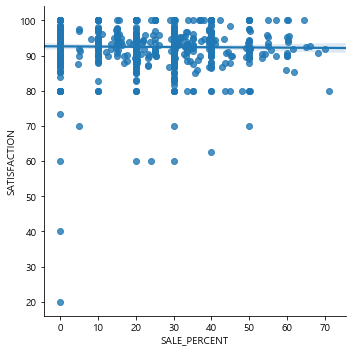

In [37]:
# MAJOR_CODE = 1, 할인율 + 만족도 : 시각화
sns.lmplot(y = "SATISFACTION", x = "SALE_PERCENT", data = sale1)

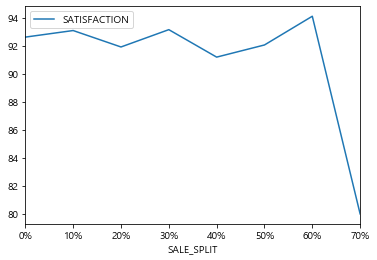

In [38]:
# MAJOR_CODE = 1, 할인율 구간별로 나누어 보기

bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0%', '10%', '20%', '30%', '40%',
          '50%', '60%', '70%', '80%', '90%']
sale1["SALE_SPLIT"] = pd.cut(sale1["SALE_PERCENT"], bins=bins, labels=labels)

sale1_b = sale1.pivot_table("SATISFACTION", "SALE_SPLIT")
sale1_b.plot()

In [39]:
# MAJOR_CODE = 2, 할인율 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, ROUND(((P.FIXED_PRICE - P.SALE_PRICE)/P.FIXED_PRICE)*100, 2) AS SALE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
  AND CA.MAJOR_CODE = '002'
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

sale2_columns = ["MAJOR_CODE", "SALE_PERCENT", "SATISFACTION"]

sale2= pd.DataFrame(arr, columns=sale2_columns)

# string -> float
sale2["SALE_PERCENT"] = sale2["SALE_PERCENT"].astype(float)
sale2["SATISFACTION"] = sale2["SATISFACTION"].astype(float)

sale2

,MAJOR_CODE,SALE_PERCENT,SATISFACTION
0,002,23.26,92.50
1,002,50.00,80.00
2,002,20.00,88.34
3,002,50.00,95.56
4,002,40.08,93.14
...,...,...,...
389,002,50.00,100.00
390,002,0.00,94.34
391,002,30.00,94.82
392,002,0.00,90.78


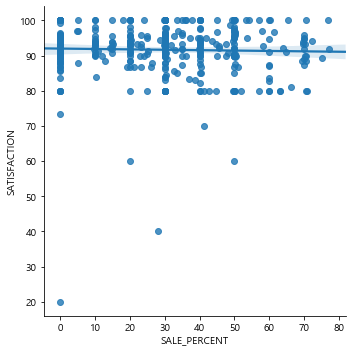

In [40]:
# MAJOR_CODE = 2, 할인율 + 만족도 : 시각화
sns.lmplot(y = "SATISFACTION", x = "SALE_PERCENT", data = sale2)

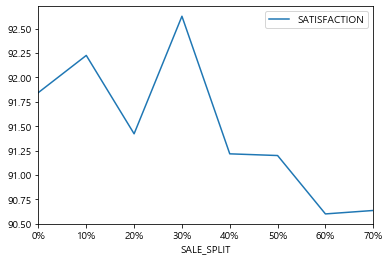

In [41]:
# MAJOR_CODE = 2, 할인율 구간별로 나누어 보기

bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0%', '10%', '20%', '30%', '40%',
          '50%', '60%', '70%', '80%', '90%']
sale2["SALE_SPLIT"] = pd.cut(sale2["SALE_PERCENT"], bins=bins, labels=labels)

sale2_b = sale2.pivot_table("SATISFACTION", "SALE_SPLIT")
sale2_b.plot()

In [45]:
# MAJOR_CODE = 3, 할인율 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, ROUND(((P.FIXED_PRICE - P.SALE_PRICE)/P.FIXED_PRICE)*100, 2) AS SALE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
  AND CA.MAJOR_CODE = '003'
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

sale3_columns = ["MAJOR_CODE", "SALE_PERCENT", "SATISFACTION"]

sale3= pd.DataFrame(arr, columns=sale3_columns)

# string -> float
sale3["SALE_PERCENT"] = sale3["SALE_PERCENT"].astype(float)
sale3["SATISFACTION"] = sale3["SATISFACTION"].astype(float)

sale3

,MAJOR_CODE,SALE_PERCENT,SATISFACTION
0,003,20.07,93.34
1,003,20.00,92.56
2,003,20.00,92.34
3,003,20.00,60.00
4,003,30.34,100.00
...,...,...,...
334,003,30.00,80.00
335,003,0.00,95.00
336,003,0.00,96.00
337,003,0.00,80.00


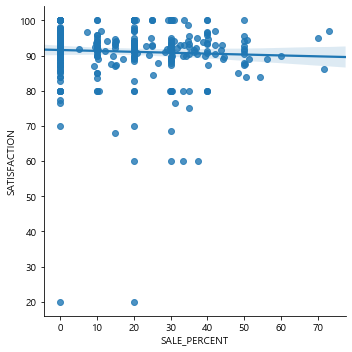

In [46]:
# MAJOR_CODE = 3, 할인율 + 만족도 : 시각화
sns.lmplot(y = "SATISFACTION", x = "SALE_PERCENT", data = sale3)

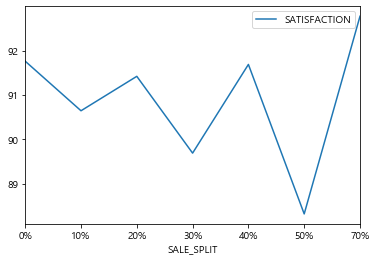

In [47]:
# MAJOR_CODE = 3, 할인율 구간별로 나누어 보기

bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0%', '10%', '20%', '30%', '40%',
          '50%', '60%', '70%', '80%', '90%']
sale3["SALE_SPLIT"] = pd.cut(sale3["SALE_PERCENT"], bins=bins, labels=labels)

sale3_b = sale3.pivot_table("SATISFACTION", "SALE_SPLIT")
sale3_b.plot()

In [5]:
# MAJOR_CODE = 18, 할인율 + 만족도 데이터 전처리 

cursor = conn.cursor()  

sql = """SELECT CA.MAJOR_CODE, ROUND(((P.FIXED_PRICE - P.SALE_PRICE)/P.FIXED_PRICE)*100, 2) AS SALE, P.SATISFACTION
FROM PRDT_INFO P, CATEGORY CA
WHERE P.SUB_CODE = CA.SUB_CODE
  AND CA.MAJOR_CODE = '018'
HAVING P.SATISFACTION != 0
ORDER BY CA.MAJOR_CODE ASC;"""
                      
cursor.execute(sql) 

arr = cursor.fetchall()

sale18_columns = ["MAJOR_CODE", "SALE_PERCENT", "SATISFACTION"]

sale18= pd.DataFrame(arr, columns=sale18_columns)

# string -> float
sale18["SALE_PERCENT"] = sale18["SALE_PERCENT"].astype(float)
sale18["SATISFACTION"] = sale18["SATISFACTION"].astype(float)

sale18

,MAJOR_CODE,SALE_PERCENT,SATISFACTION
0,018,0.00,94.58
1,018,20.00,83.34
2,018,47.97,93.64
3,018,0.00,80.00
4,018,23.33,85.00
...,...,...,...
88,018,27.37,91.42
89,018,0.00,94.80
90,018,20.00,94.80
91,018,0.00,94.34


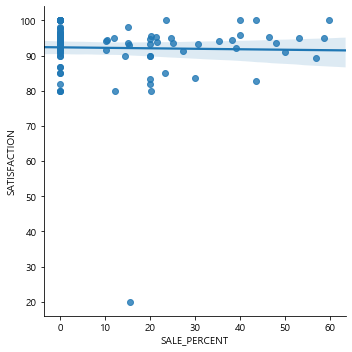

In [6]:
# MAJOR_CODE = 18, 할인율 + 만족도 : 시각화
sns.lmplot(y = "SATISFACTION", x = "SALE_PERCENT", data = sale18)

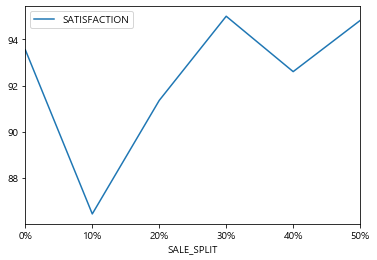

In [8]:
# MAJOR_CODE = 18, 할인율 구간별로 나누어 보기

bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0%', '10%', '20%', '30%', '40%',
          '50%', '60%', '70%', '80%', '90%']
sale18["SALE_SPLIT"] = pd.cut(sale18["SALE_PERCENT"], bins=bins, labels=labels)

sale18_b = sale18.pivot_table("SATISFACTION", "SALE_SPLIT")
sale18_b.plot()

### 최종 결론

    할인율에 따라 고객의 만족도는 큰차이를 보이지 않음
    고객은 자신의 선택에 대체적으로 만족하는 것 같음